# <font color='blue'>EDA Dados Multivariados</font>
## <font color='blue'>Welington Nogueira</font>
### <font color='blue'>Objetivo: Realizar o processo completo de EDA em um conjunto de dados multivariados, assim como a aplicação de um modelo de Random Forest para detectar a importância de cada variável e a realização de Teste de Hipótese para determinar os fatores mais relevantes que exoplicam a resposta dos clientes às campanhas de Marketing</font>

### Instalando e Carregando Pacotes

In [30]:
# Imports
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

In [33]:
# Carrega o dataset
df = pd.read_csv("dataset.csv")

In [35]:
# Shape
df.shape

(2237, 25)

In [37]:
# Amostra dos dados
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,"$55,375.00",0,1,10/17/13,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,"$77,037.00",0,1,10/13/13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,"$24,163.00",1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,"$69,476.00",0,0,9/30/13,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,"$72,063.00",0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


In [39]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         2237 non-null   int64 
 1    Ano_Nascimento            2237 non-null   int64 
 2    Educacao                  2237 non-null   object
 3    Estado_Civil              2237 non-null   object
 4    Renda                     2213 non-null   object
 5    Criancas_Em_Casa          2237 non-null   int64 
 6    Adolescentes_Em_Casa      2237 non-null   int64 
 7    Data_Cadastro_Cliente     2237 non-null   object
 8    Gasto_Vinhos              2237 non-null   int64 
 9    Gasto_Frutas              2237 non-null   int64 
 10   Gasto_Carnes              2237 non-null   int64 
 11   Gasto_Peixes              2237 non-null   int64 
 12   Gasto_Doces               2237 non-null   int64 
 13   Gasto_Outros              2237 non-null   int64 
 14   Num_Com

## Limpeza e Processamento Inicial dos Dados

In [42]:
# Remover o espaço extra nos títulos das colunas
df.columns = df.columns.str.replace(' ', '') 

In [44]:
# A variável Renda tem o caracter $. Remover esse caracter especial para ter a coluna como numérica
df['Renda'] = df['Renda'].str.replace('$', '').str.replace(',', '').astype(float) 

In [46]:
# A coluna de data está como tipo object. Converter para o tipo datetime
df['Data_Cadastro_Cliente'] = pd.to_datetime(df['Data_Cadastro_Cliente']) 

In [50]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2237 non-null   int64         
 1   Ano_Nascimento            2237 non-null   int64         
 2   Educacao                  2237 non-null   object        
 3   Estado_Civil              2237 non-null   object        
 4   Renda                     2213 non-null   float64       
 5   Criancas_Em_Casa          2237 non-null   int64         
 6   Adolescentes_Em_Casa      2237 non-null   int64         
 7   Data_Cadastro_Cliente     2237 non-null   datetime64[ns]
 8   Gasto_Vinhos              2237 non-null   int64         
 9   Gasto_Frutas              2237 non-null   int64         
 10  Gasto_Carnes              2237 non-null   int64         
 11  Gasto_Peixes              2237 non-null   int64         
 12  Gasto_Doces         

In [52]:
# Amostra dos dados
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


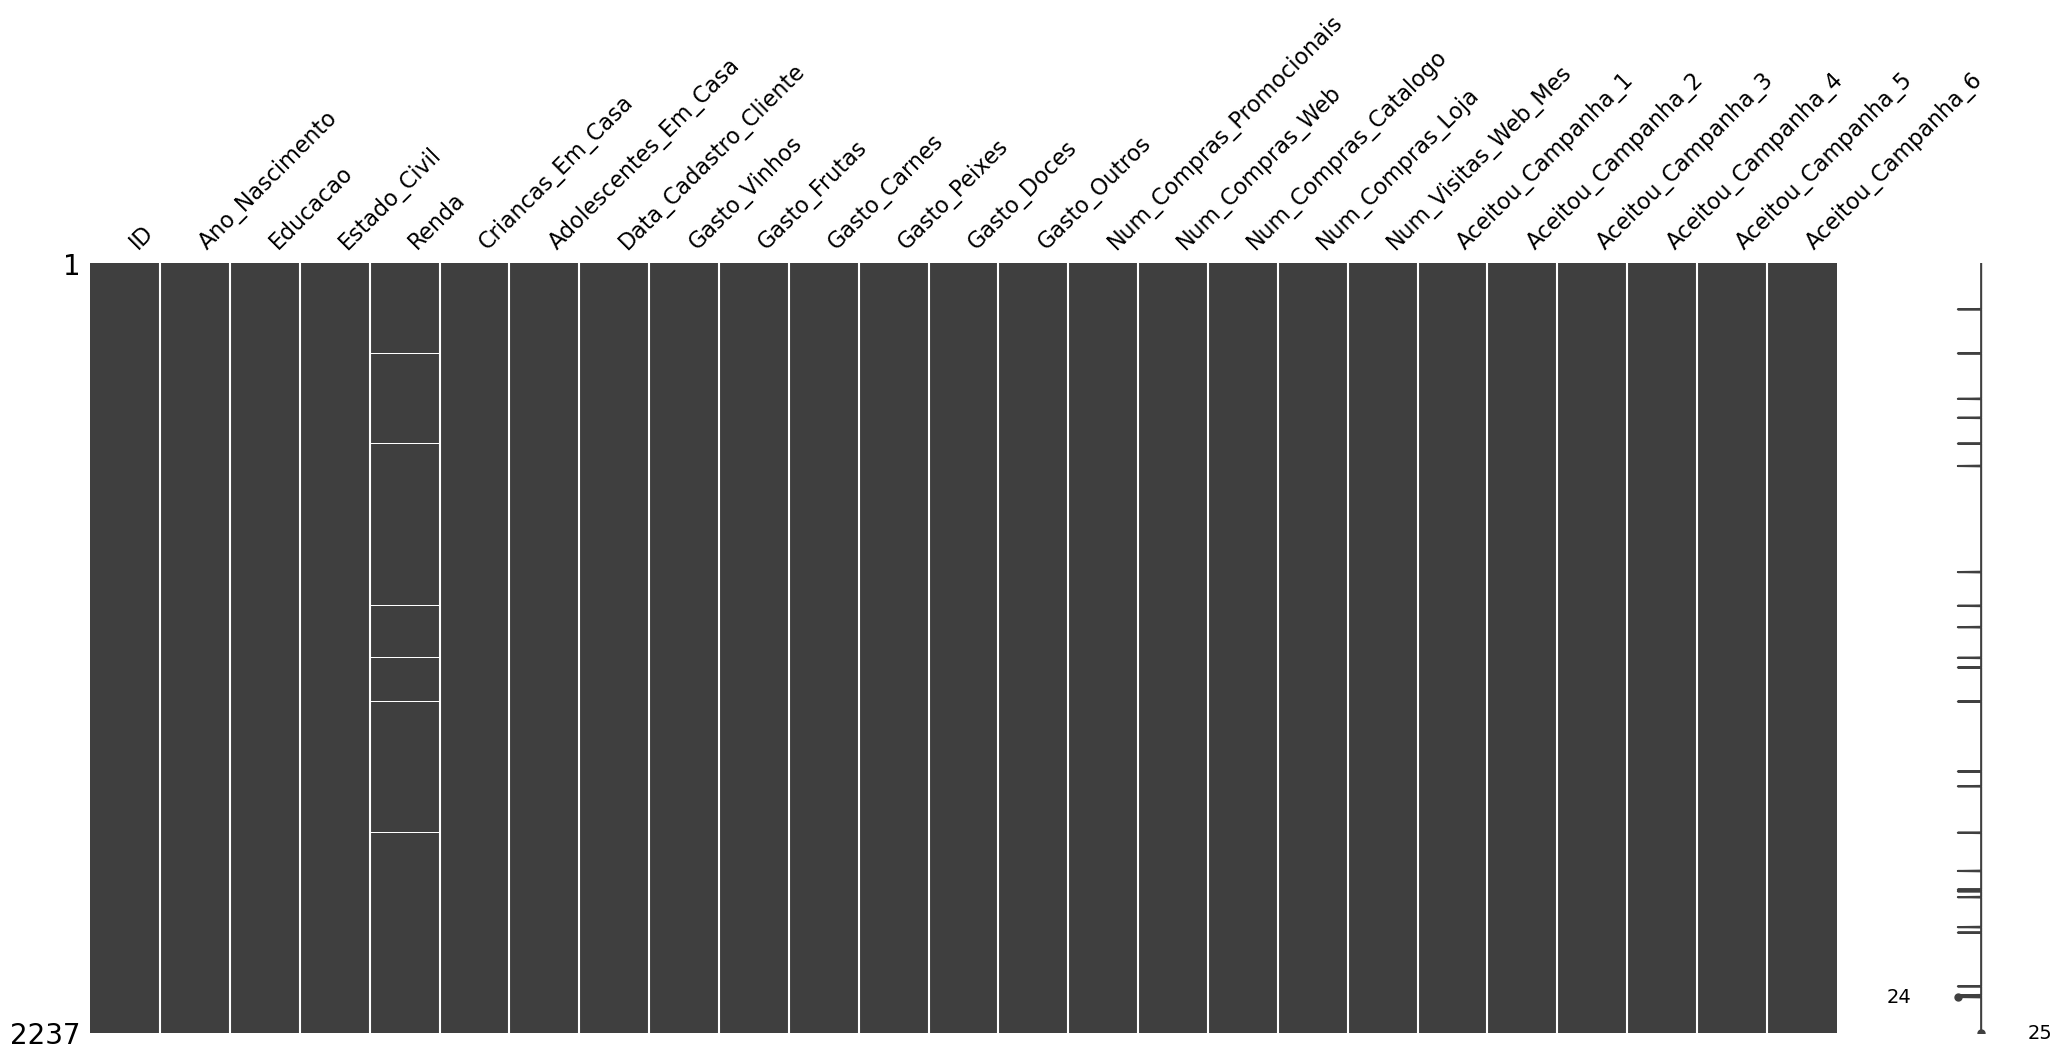

In [54]:
# Matriz de valores ausentes
msno.matrix(df)
plt.show()

In [56]:
# Soma de valores ausentes
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [58]:
valores_ausentes

Renda                       24
ID                           0
Gasto_Outros                 0
Aceitou_Campanha_5           0
Aceitou_Campanha_4           0
Aceitou_Campanha_3           0
Aceitou_Campanha_2           0
Aceitou_Campanha_1           0
Num_Visitas_Web_Mes          0
Num_Compras_Loja             0
Num_Compras_Catalogo         0
Num_Compras_Web              0
Num_Compras_Promocionais     0
Gasto_Doces                  0
Ano_Nascimento               0
Gasto_Peixes                 0
Gasto_Carnes                 0
Gasto_Frutas                 0
Gasto_Vinhos                 0
Data_Cadastro_Cliente        0
Adolescentes_Em_Casa         0
Criancas_Em_Casa             0
Estado_Civil                 0
Educacao                     0
Aceitou_Campanha_6           0
dtype: int64

In [60]:
# Filtrar pelas que são diferentes de zero
print(valores_ausentes.loc[valores_ausentes != 0])

Renda    24
dtype: int64


Antes de tratar os valores ausentes, primeiro deve=se checar se há outliers na variável, o que ajudará a tomar a decisão ideal de tratamento dos valores ausentes.

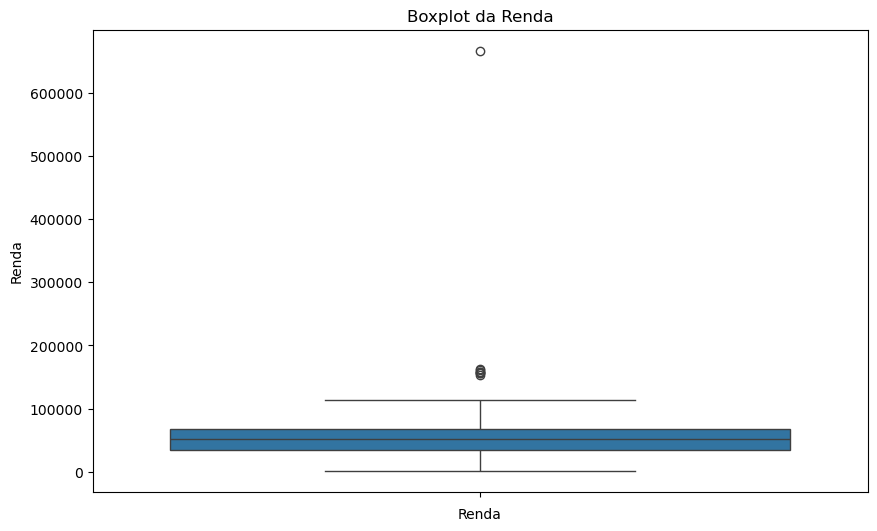

In [63]:
# Vamos usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Sim, parece haver outliers. Usar IQR para ter certeza.

In [66]:
# Calculando o IQR para a coluna 'Renda'
Q1 = df['Renda'].quantile(0.25)
Q3 = df['Renda'].quantile(0.75)
IQR = Q3 - Q1

In [68]:
# Definindo os limites para considerar um ponto como outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [70]:
# Identificando os outliers
outliers = df[(df['Renda'] < lower_bound) | (df['Renda'] > upper_bound)]
outliers

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
325,4931,1977,Graduação,Casado,157146.0,0,0,2013-04-29,1,0,...,0,28,0,1,0,0,0,0,0,0
497,1501,1982,PhD,Casado,160803.0,0,0,2008-04-12,55,16,...,0,28,1,0,0,0,0,0,0,0
526,9432,1977,Graduação,Casado,666666.0,1,0,2006-02-13,9,14,...,3,1,3,6,0,0,0,0,0,0
730,1503,1976,PhD,Casado,162397.0,1,1,2006-03-13,85,1,...,0,0,1,1,0,0,0,0,0,0
851,5336,1971,Mestrado,Casado,157733.0,1,0,2006-04-13,39,1,...,1,0,1,1,0,0,0,0,0,0
1787,5555,1975,Graduação,Divorciado,153924.0,0,0,2002-07-14,1,1,...,0,0,0,0,0,0,0,0,0,0
1886,11181,1949,PhD,Casado,156924.0,0,0,2013-08-29,2,1,...,0,0,0,0,0,0,0,0,0,0
2165,8475,1973,PhD,Casado,157243.0,0,1,2003-01-14,20,2,...,0,22,0,0,0,0,0,0,0,0


Checar a distribuição da variável.

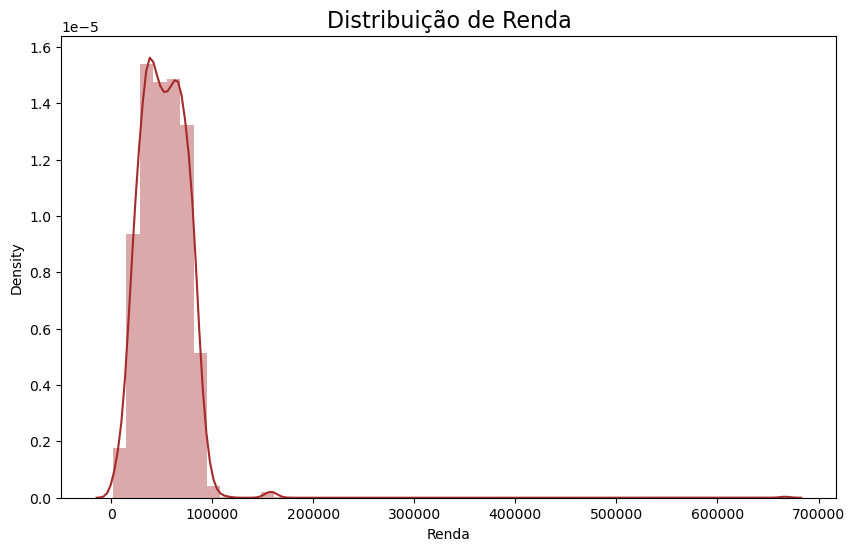

In [72]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Como são poucos registros, vou apenas remover os outliers.

In [75]:
# Filtrando o dataframe e removendo os outliers
df = df[(df['Renda'] >= lower_bound) & (df['Renda'] <= upper_bound)]

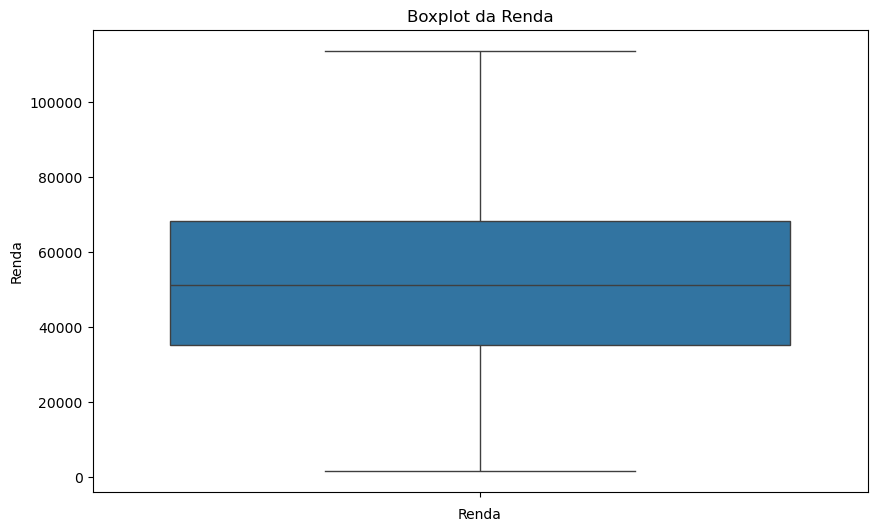

In [77]:
# Usar um boxplot para visualizar se há outliers na coluna 'Renda'
plt.figure(figsize = (10, 6))
sns.boxplot(df['Renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

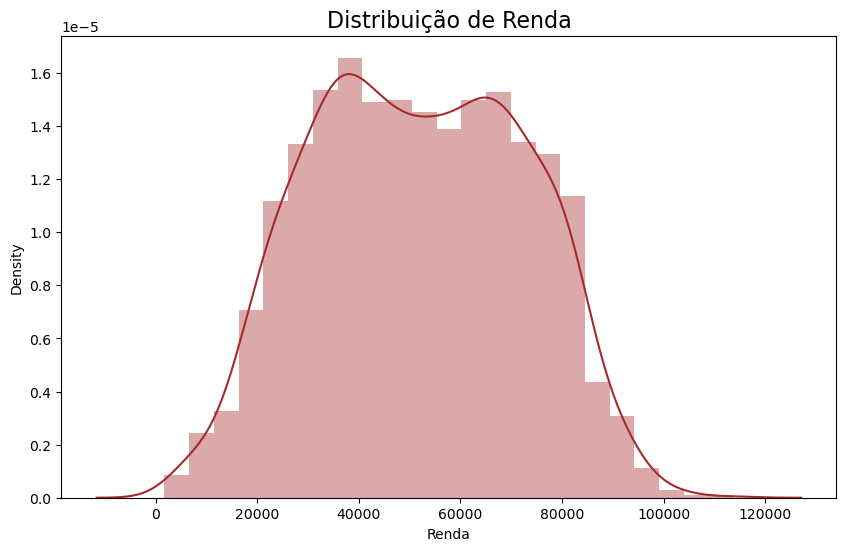

In [79]:
# Definindo o tamanho da figura
plt.figure(figsize = (10, 6)) 

# Criando o gráfico de distribuição
sns.distplot(df['Renda'], color = 'brown')  

# Definindo o título
plt.title('Distribuição de Renda', size = 16)  

# Exibindo o gráfico
plt.show()

Valores ausentes tratados.

In [81]:
# Normalizar os dados antes de aplicar o KNNImputer (recomendado)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Renda']])

In [83]:
# Cria o KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [85]:
# Imputa os valores ausentes com o imputer
data_imputed = imputer.fit_transform(data_scaled)

In [87]:
# Converter de volta para o formato original 
df['Renda'] = scaler.inverse_transform(data_imputed)

In [89]:
print('Total de Valores Ausentes:', df.isnull().sum().sum()) # sum() duas vezes porque é o total do total

Total de Valores Ausentes: 0


In [91]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,1,6,2,0,0,0,0,0,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,7,12,3,0,0,0,0,0,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,1,0,3,4,0,0,0,0,0,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,6,4,2,0,0,0,0,0,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,5,2,12,2,0,0,0,0,0,0


## Análise Exploratória e Engenharia de Atributos

In [93]:
# Colunas
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6'],
      dtype='object')

In [95]:
# Drop das colunas categóricas para criar o box plot das colunas quantitativas
data_boxplot = df.drop(columns = ['ID',
                                  'Educacao',
                                  'Estado_Civil',
                                  'Criancas_Em_Casa',
                                  'Data_Cadastro_Cliente',
                                  'Adolescentes_Em_Casa', 
                                  'Aceitou_Campanha_1', 
                                  'Aceitou_Campanha_2',
                                  'Aceitou_Campanha_3', 
                                  'Aceitou_Campanha_4', 
                                  'Aceitou_Campanha_5',
                                  'Aceitou_Campanha_6'])

In [97]:
data_boxplot.columns

Index(['Ano_Nascimento', 'Renda', 'Gasto_Vinhos', 'Gasto_Frutas',
       'Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes'],
      dtype='object')

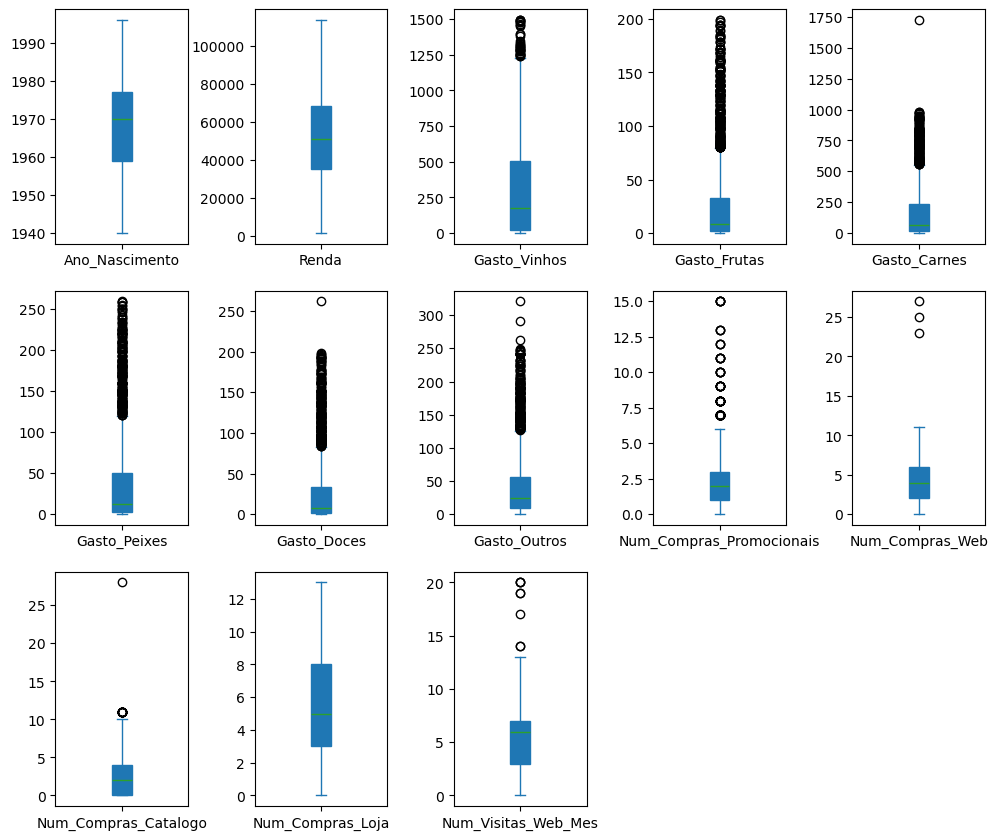

In [99]:
# Plot
data_boxplot.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5);

> Vou transformar algumas variáveis, criar novas e combinar outras em um trabalho de engenharia de atributos que vai facilitar a exploração dos dados.

In [102]:
# Criar uma nova coluna com a idade de cada cliente (ano atual - ano de nascimento)
ano_atual = datetime.now().year
df['Idade'] = ano_atual - df['Ano_Nascimento']

In [104]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,1,6,2,0,0,0,0,0,0,48
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,7,12,3,0,0,0,0,0,0,65
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,3,4,0,0,0,0,0,0,55
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,6,4,2,0,0,0,0,0,0,56
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,12,2,0,0,0,0,0,0,46


In [106]:
# Criaremos uma coluna com o número de dias como cliente desde a data de cadastro
df['Dias_Como_Cliente'] = df['Data_Cadastro_Cliente'].max() - df['Data_Cadastro_Cliente']

In [108]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,48,255 days
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,65,259 days
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,55,1294 days
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,56,272 days
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,46,2665 days


In [110]:
# Removeremos a palavra "days" ao final do valor de cada linha da coluna Dias_Como_Cliente
df['Dias_Como_Cliente'] = df['Dias_Como_Cliente'].astype(str).str.replace(' days', '')

In [112]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,6,2,0,0,0,0,0,0,48,255
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,12,3,0,0,0,0,0,0,65,259
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,3,4,0,0,0,0,0,0,55,1294
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,4,2,0,0,0,0,0,0,56,272
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,12,2,0,0,0,0,0,0,46,2665


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [118]:
# Ajusta o tipo de dado da variável Dias_Como_Cliente
df['Dias_Como_Cliente'] = pd.to_numeric(df['Dias_Como_Cliente'], downcast = 'integer')

In [120]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [124]:
# Cria uma variável com o Total de Compras realizadas nos 3 diferentes canais
df['TotalCompras'] = df['Num_Compras_Web'] + df['Num_Compras_Catalogo'] + df['Num_Compras_Loja']

In [126]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Num_Visitas_Web_Mes,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,2,0,0,0,0,0,0,48,255,8
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,3,0,0,0,0,0,0,65,259,26
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,4,0,0,0,0,0,0,55,1294,4
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,2,0,0,0,0,0,0,56,272,14
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,2,0,0,0,0,0,0,46,2665,19


In [128]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras'],
      dtype='object')

In [130]:
# Criar a variável Gasto_Total com o somatório de todas as colunas que começam com o nome Gasto
df['Gasto_Total'] = df.filter(like = 'Gasto').sum(axis=1)

In [132]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,0,48,255,8,162
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,0,65,259,26,1123
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,0,55,1294,4,17
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,0,56,272,14,1044
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,0,46,2665,19,758


In [134]:
df.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Em_Casa', 'Adolescentes_Em_Casa', 'Data_Cadastro_Cliente',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2205 non-null   int64         
 1   Ano_Nascimento            2205 non-null   int64         
 2   Educacao                  2205 non-null   object        
 3   Estado_Civil              2205 non-null   object        
 4   Renda                     2205 non-null   float64       
 5   Criancas_Em_Casa          2205 non-null   int64         
 6   Adolescentes_Em_Casa      2205 non-null   int64         
 7   Data_Cadastro_Cliente     2205 non-null   datetime64[ns]
 8   Gasto_Vinhos              2205 non-null   int64         
 9   Gasto_Frutas              2205 non-null   int64         
 10  Gasto_Carnes              2205 non-null   int64         
 11  Gasto_Peixes              2205 non-null   int64         
 12  Gasto_Doces              

In [138]:
df['Aceitou_Campanha_1'].value_counts()

Aceitou_Campanha_1
0    2042
1     163
Name: count, dtype: int64

In [140]:
df['Aceitou_Campanha_2'].value_counts()

Aceitou_Campanha_2
0    2041
1     164
Name: count, dtype: int64

In [142]:
# Criar a variável para indicar se o cliente aceitou qualquer campanha (e comprou o produto ofertado)
df['aceite_campanha'] = df.filter(like = 'Aceitou').sum(axis = 1)

In [144]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,0,48,255,8,162,0
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,0,65,259,26,1123,0
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,0,55,1294,4,17,0
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,0,56,272,14,1044,0
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,0,46,2665,19,758,0


In [146]:
df.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha
1773,9710,1969,PhD,Divorciado,58086.0,0,1,2013-01-20,708,7,...,0,0,0,0,0,56,525,21,792,0
1592,9167,1956,Graduação,Casado,67131.0,0,1,2013-03-26,465,71,...,0,0,0,0,0,69,460,23,976,0
2146,5046,1958,Graduação,Divorciado,78331.0,0,1,2014-01-23,756,138,...,0,0,0,0,0,67,157,23,1638,0
514,9485,1986,PhD,Casado,45921.0,0,0,2003-10-14,102,9,...,0,0,0,0,0,39,3911,9,199,0
1259,4427,1995,Ensino Médio,Solteiro,83257.0,0,0,2012-09-18,536,27,...,0,1,0,0,1,30,649,27,1365,3
1124,6673,1965,Graduação,Solteiro,23478.0,0,0,2013-03-19,28,6,...,0,0,0,0,0,60,467,6,129,0
1192,839,1975,PhD,Casado,45503.0,1,0,2013-09-25,97,4,...,0,0,0,0,0,50,277,8,170,0
1230,7723,1979,Graduação,Casado,75507.0,0,0,2005-02-14,709,93,...,0,0,0,0,0,46,3422,20,1440,0
968,1717,1988,Graduação,Solteiro,39747.0,1,0,2014-04-13,80,15,...,0,0,0,0,0,37,77,10,273,0
331,4459,1989,Graduação,Solteiro,30279.0,1,0,2012-12-30,10,4,...,0,0,0,0,0,36,546,4,37,0


In [148]:
# Ajustar o tipo de dado e colocar em uma nova coluna
df['RespostaCampanha'] = df['aceite_campanha'].apply(lambda x: 'Aceitou' if x > 0 else 'Não Aceitou')

In [150]:
df.head()

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
0,9970,1977,Graduação,Casado,55375.0,0,1,2013-10-17,42,11,...,0,0,0,0,48,255,8,162,0,Não Aceitou
1,4002,1960,PhD,Casado,77037.0,0,1,2013-10-13,463,96,...,0,0,0,0,65,259,26,1123,0,Não Aceitou
2,10914,1970,Graduação,Solteiro,24163.0,1,1,2010-12-13,4,1,...,0,0,0,0,55,1294,4,17,0,Não Aceitou
3,7279,1969,PhD,Casado,69476.0,0,0,2013-09-30,260,86,...,0,0,0,0,56,272,14,1044,0,Não Aceitou
4,10582,1979,Graduação,Casado,72063.0,0,1,2007-03-13,180,32,...,0,0,0,0,46,2665,19,758,0,Não Aceitou


In [152]:
df.sample(10)

,ID,Ano_Nascimento,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Data_Cadastro_Cliente,Gasto_Vinhos,Gasto_Frutas,...,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,aceite_campanha,RespostaCampanha
1466,425,1985,Graduação,Casado,55357.0,2,0,2013-02-19,374,64,...,0,0,0,0,40,495,19,727,0,Não Aceitou
1008,7119,1982,Graduação,Solteiro,68627.0,0,0,2001-12-13,395,15,...,0,0,0,0,43,4581,11,825,0,Não Aceitou
1394,1993,1949,PhD,Casado,58607.0,0,1,2012-12-23,867,0,...,0,0,0,0,76,553,14,972,1,Aceitou
1784,3182,1973,PhD,Solteiro,46854.0,1,1,2014-03-31,96,1,...,0,0,0,1,52,90,9,263,2,Aceitou
1842,6376,1979,Graduação,Solteiro,57537.0,1,0,2006-10-13,191,56,...,0,0,0,0,46,2816,15,545,0,Não Aceitou
1734,10648,1982,Ensino Médio,Casado,66664.0,0,0,2012-09-25,398,96,...,0,0,0,0,43,642,18,1289,0,Não Aceitou
1599,10686,1965,PhD,Casado,34230.0,1,1,2012-12-26,15,0,...,0,0,0,0,60,550,3,21,0,Não Aceitou
1516,2410,1969,Graduação,Solteiro,81657.0,0,0,2014-01-22,364,40,...,0,0,0,0,56,158,15,1097,0,Não Aceitou
1333,5935,1956,Mestrado,Solteiro,55284.0,0,1,2012-12-24,547,7,...,0,0,0,0,69,552,20,764,0,Não Aceitou
1272,13,1947,PhD,Viúvo,25358.0,0,1,2013-07-22,19,0,...,0,0,0,0,78,342,4,32,0,Não Aceitou


In [154]:
# Observar uma amostra aleatória das variáveis criadas
df[['Idade', 'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha']].sample(10)

,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
84,65,868,13,371,Não Aceitou
1224,31,676,20,1004,Não Aceitou
2137,72,1144,21,859,Não Aceitou
1911,65,438,4,25,Não Aceitou
126,49,398,10,257,Não Aceitou
1897,69,3880,5,32,Não Aceitou
1185,73,4855,6,94,Não Aceitou
1398,51,2025,27,1174,Não Aceitou
210,80,32,27,277,Não Aceitou
1149,62,717,4,43,Não Aceitou


In [156]:
# Remover variáveis
df.drop(['Ano_Nascimento', 'Data_Cadastro_Cliente', 'aceite_campanha'], axis = 1, inplace = True)

In [158]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,48,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,65,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,55,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,56,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,46,2665,19,758,Não Aceitou


In [160]:
df.describe()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,Aceitou_Campanha_1,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,56.095692,1307.092971,12.569615,606.821769
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,11.705801,1429.824606,7.180350,601.675284
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,29.000000,0.000000,0.000000,5.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,48.000000,286.000000,6.000000,69.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,55.000000,583.000000,12.000000,397.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,66.000000,2116.000000,18.000000,1047.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,85.000000,4915.000000,32.000000,2525.000000


## Extraindo Insights com Análise Multivariada

### Qual o Comportamento das Variáveis?

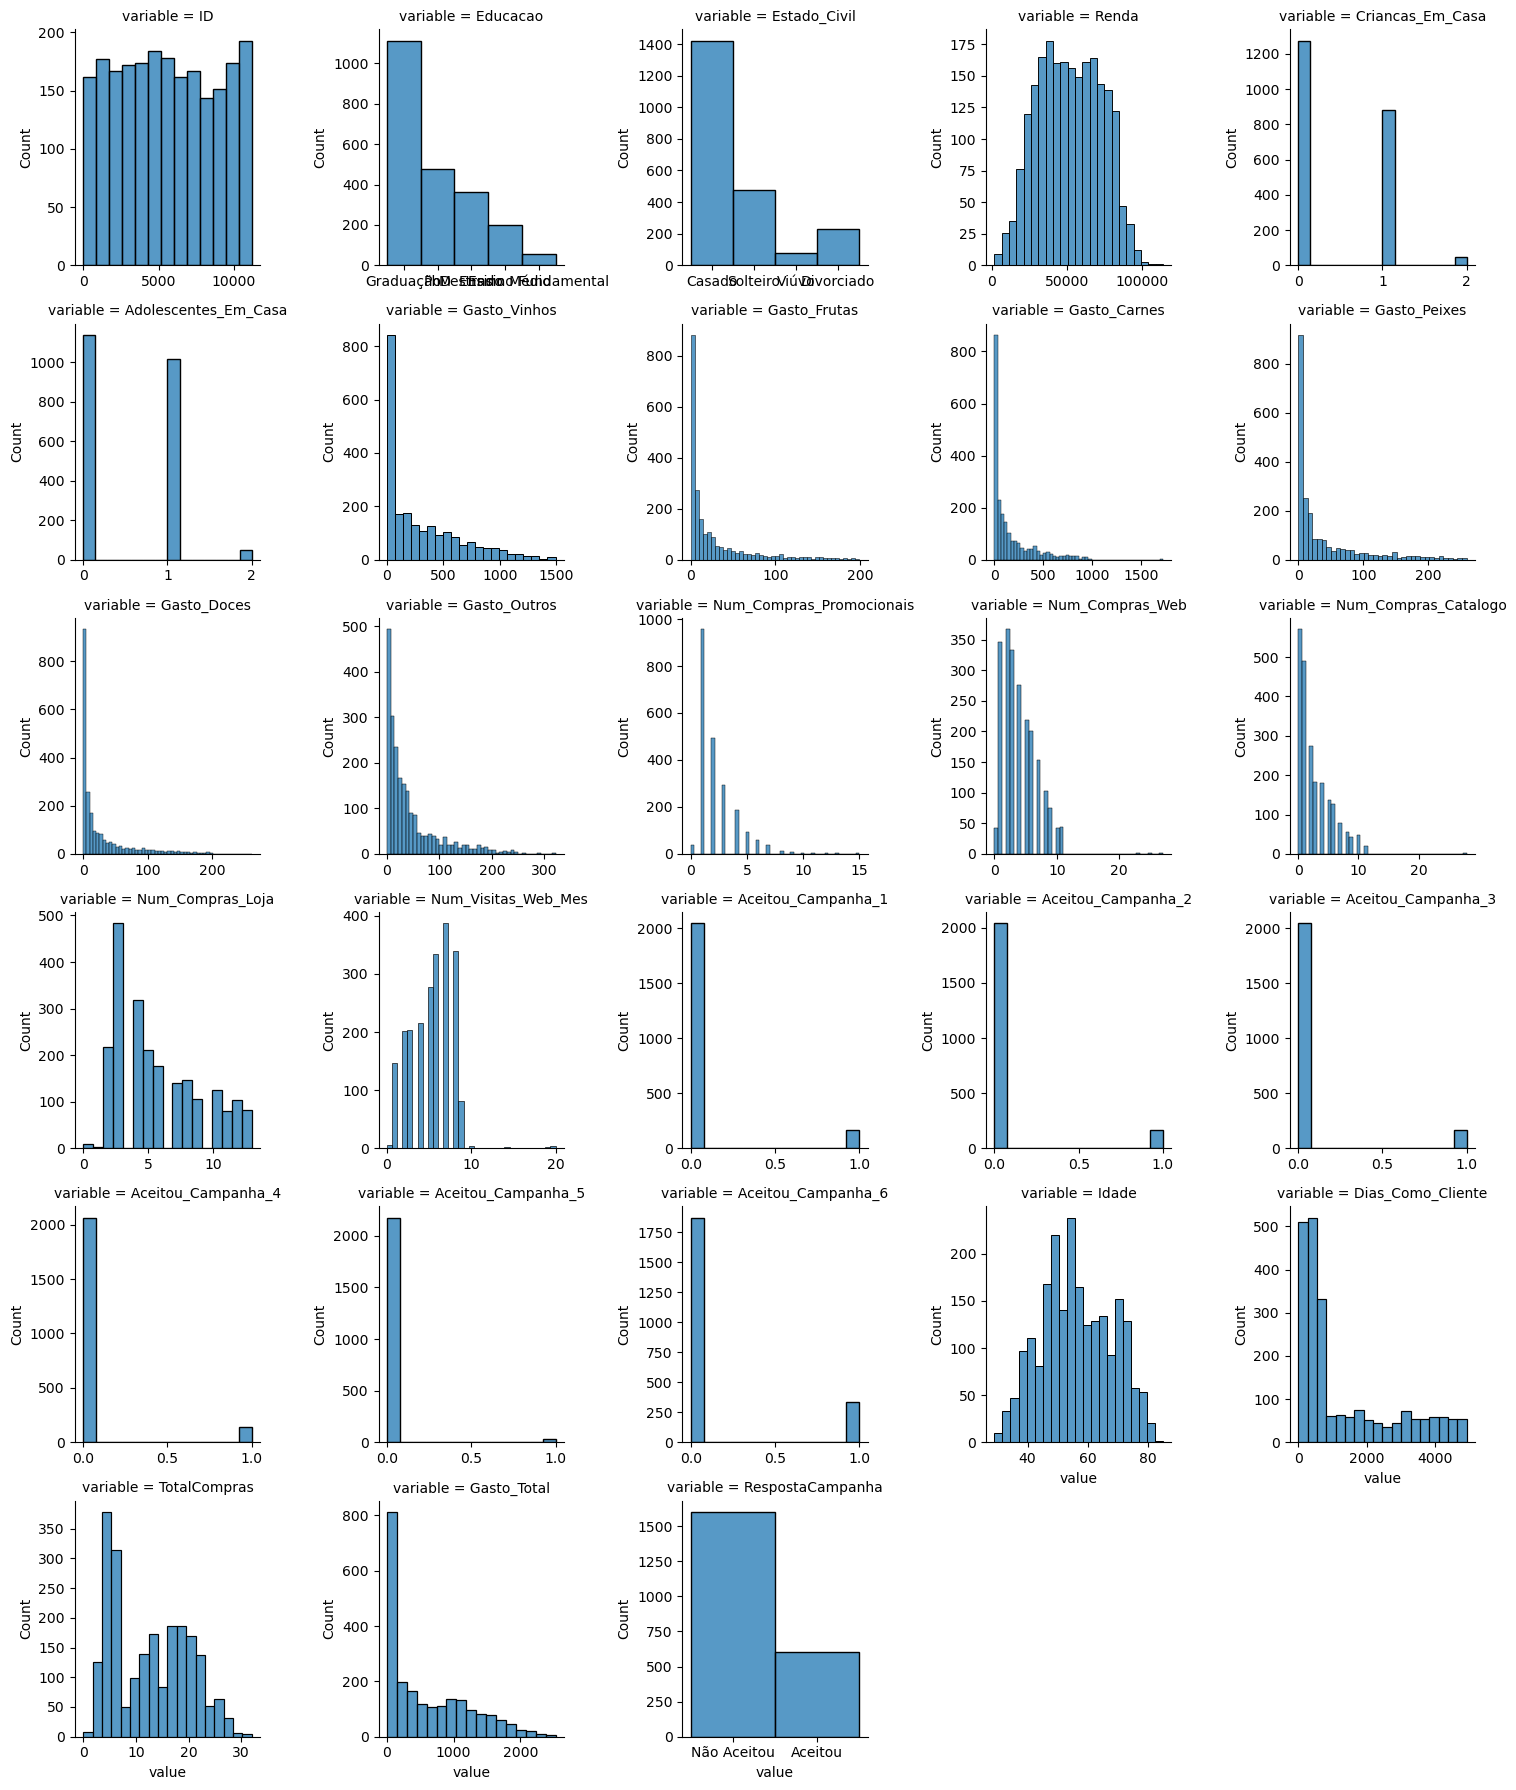

In [170]:
# Distribuição das Variáveis
hist = pd.melt(df, value_vars = df )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value')

### Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?

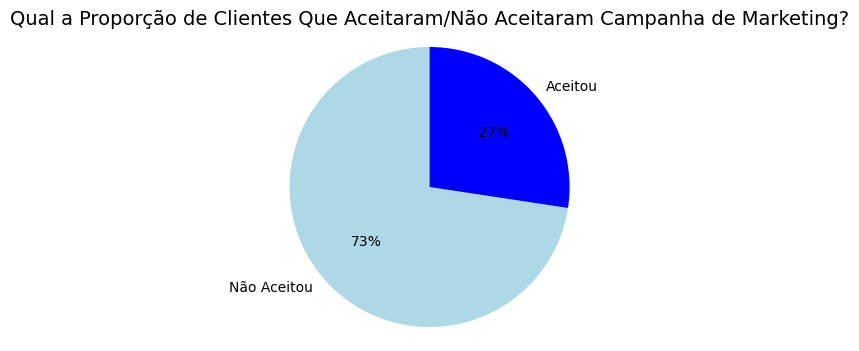

In [179]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (6, 4))

# Conta as ocorrências de cada resposta
counts = df['RespostaCampanha'].value_counts()
labels = counts.index.tolist()

# Define cores específicas na ordem dos labels
color_map = {
    "Aceitou": "blue",
    "Não Aceitou": "lightblue"
}

colors = [color_map[label] for label in labels]

# Pie chart
ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Título
ax.set_title('Qual a Proporção de Clientes Que Aceitaram/Não Aceitaram Campanha de Marketing?', fontsize=14)

# Mantém os eixos iguais
ax.axis('equal')

# Display
plt.show()

### Qual a Taxa de Sucesso de Cada Uma das 6 Campanhas?

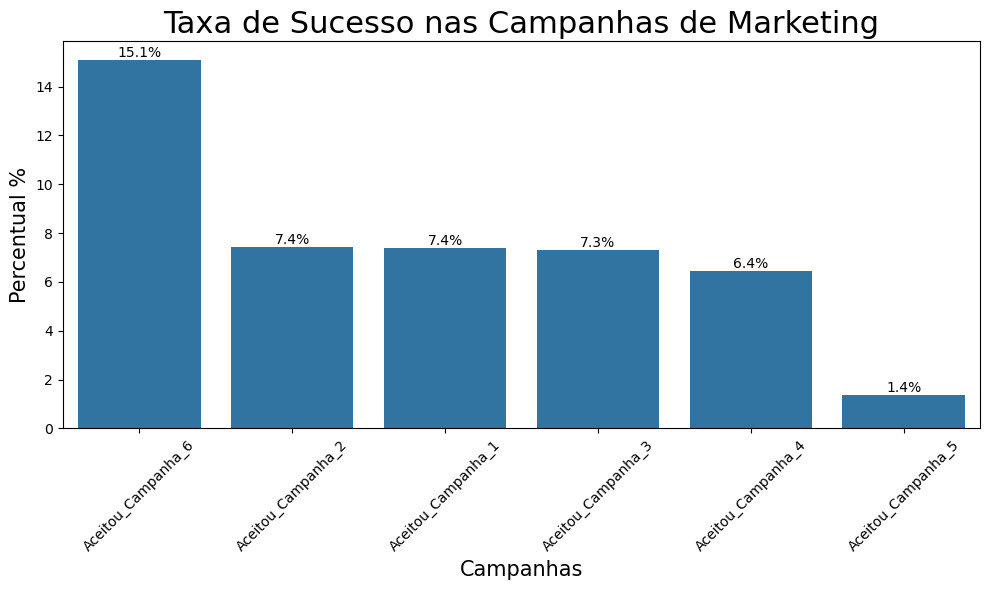

In [182]:
# Lista de campanhas
Campanhas = ['Aceitou_Campanha_1', 
             'Aceitou_Campanha_2', 
             'Aceitou_Campanha_3', 
             'Aceitou_Campanha_4', 
             'Aceitou_Campanha_5', 
             'Aceitou_Campanha_6']

# Calcula o percentual
campaigns = pd.DataFrame(df[Campanhas].mean() * 100, columns = ['Percent']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', y = 'Percent', data = campaigns.sort_values('Percent', ascending = False))

# Labels
plt.xlabel('Campanhas', size=15)
plt.ylabel('Percentual %', size=15)
plt.title('Taxa de Sucesso nas Campanhas de Marketing', size = 22)

# Inclui o percentual no gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha = 'center', 
                va = 'bottom')

# Inclina os rótulos no eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Display 
plt.tight_layout()
plt.show()

### A Idade Tem Influência nas Decisões de Gastos dos Clientes?

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2205 non-null   int64  
 1   Educacao                  2205 non-null   object 
 2   Estado_Civil              2205 non-null   object 
 3   Renda                     2205 non-null   float64
 4   Criancas_Em_Casa          2205 non-null   int64  
 5   Adolescentes_Em_Casa      2205 non-null   int64  
 6   Gasto_Vinhos              2205 non-null   int64  
 7   Gasto_Frutas              2205 non-null   int64  
 8   Gasto_Carnes              2205 non-null   int64  
 9   Gasto_Peixes              2205 non-null   int64  
 10  Gasto_Doces               2205 non-null   int64  
 11  Gasto_Outros              2205 non-null   int64  
 12  Num_Compras_Promocionais  2205 non-null   int64  
 13  Num_Compras_Web           2205 non-null   int64  
 14  Num_Compras_C

In [187]:
# Filtrar as colunas categóricas e calcular a correlação das colunas quantitativas
df_corr = df.drop(['ID',
                   'Educacao',
                   'Estado_Civil',
                   'Criancas_Em_Casa',
                   'Adolescentes_Em_Casa', 
                   'Aceitou_Campanha_1', 
                   'Aceitou_Campanha_2',
                   'Aceitou_Campanha_3', 
                   'Aceitou_Campanha_4', 
                   'Aceitou_Campanha_5',
                   'Aceitou_Campanha_6', 
                   'Educacao',
                   'RespostaCampanha'], axis = 1).corr()

In [189]:
column_corr = df_corr.loc['Idade']

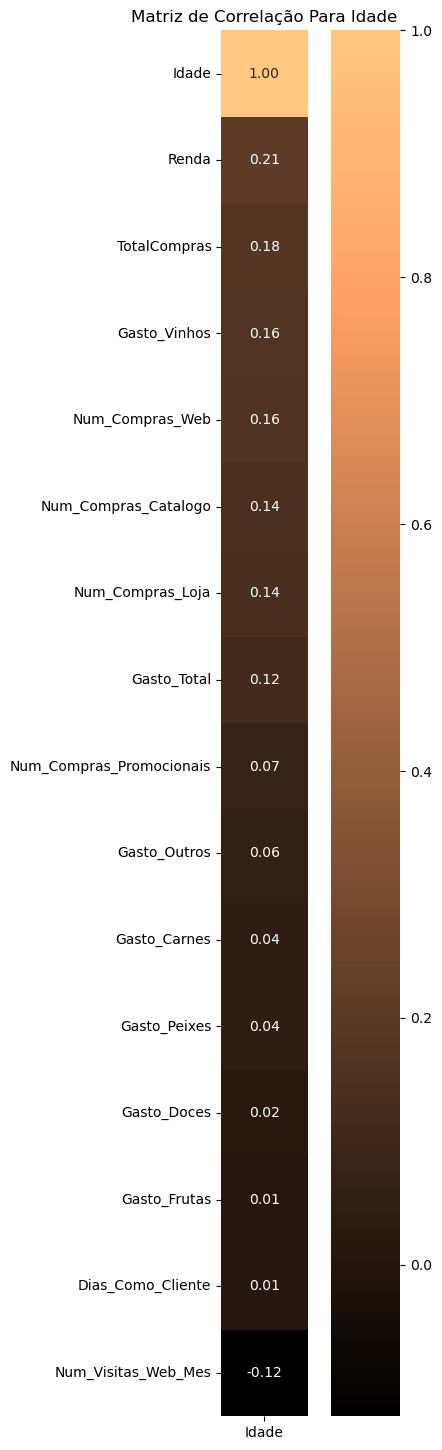

In [191]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

### Qual a Relação Entre Gasto Total e Resposta às Campanhas de Marketing?

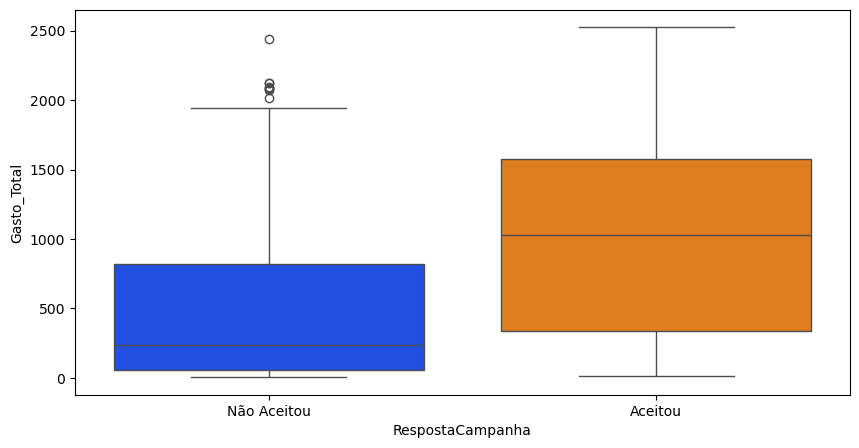

In [194]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Total', data = df, palette = 'bright');

### Em Qual Categoria de Produto os Clientes Têm Maior Gasto?

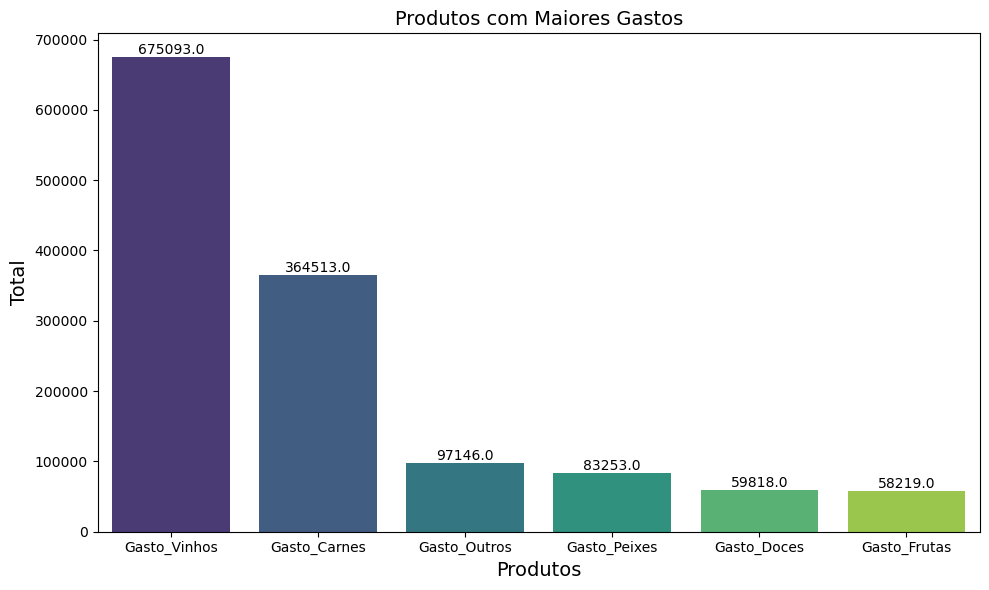

In [197]:
# Categorias de produtos
produtos = ['Gasto_Vinhos', 
            'Gasto_Frutas',
            'Gasto_Carnes', 
            'Gasto_Peixes',
            'Gasto_Doces',
            'Gasto_Outros']

# Cria o dataframe com os totais
df_produtos = pd.DataFrame(df[produtos].sum(), columns = ['Sum']).reset_index()

# Plot
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'index', 
                 y = 'Sum', 
                 data = df_produtos.sort_values('Sum', ascending = False), 
                 palette = 'viridis')

# Labels
plt.xlabel('Produtos', size = 14)
plt.ylabel('Total', size = 14)
plt.title('Produtos com Maiores Gastos', size = 14)

# Inclui os valores no gráfico
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

# Display 
plt.tight_layout()
plt.show()

### Qual a Relação Entre Gasto com Vinho e Resposta às Campanhas de Marketing?

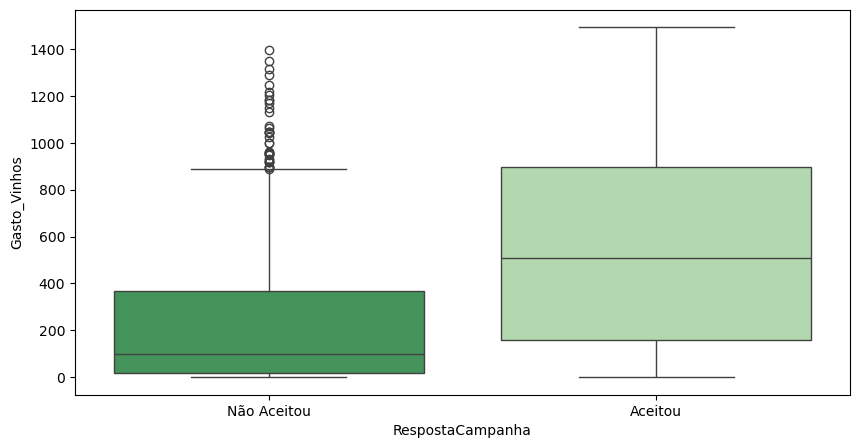

In [200]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Gasto_Vinhos', data = df, palette = 'Greens_r');

### Qual a Relação Entre Renda e Resposta às Campanhas de Marketing?

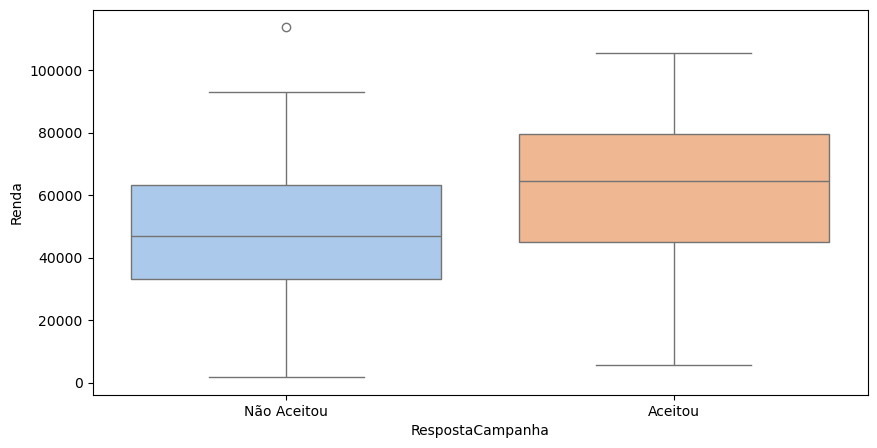

In [203]:
# Plot
plt.figure(figsize = (10,5))
sns.boxplot(x = 'RespostaCampanha', y = 'Renda', data = df, palette = 'pastel');

### Qual a Relação Entre Renda e Gasto Total?

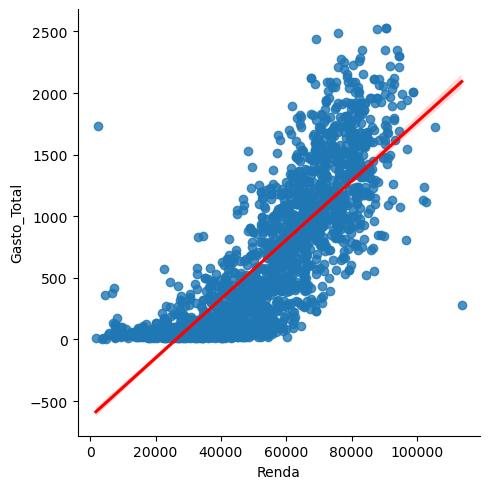

In [206]:
# Plot
sns.lmplot(x = 'Renda', y = 'Gasto_Total', data = df, palette = 'blue', line_kws = {'color': 'red'})

### Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Aceitar ou Não a Campanha?

In [209]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,Graduação,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,48,255,8,162,Não Aceitou
1,4002,PhD,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,65,259,26,1123,Não Aceitou
2,10914,Graduação,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,55,1294,4,17,Não Aceitou
3,7279,PhD,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,56,272,14,1044,Não Aceitou
4,10582,Graduação,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,46,2665,19,758,Não Aceitou


In [211]:
# Converter as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df_imp = pd.get_dummies(df, columns = ['Educacao', 'Estado_Civil'])

In [213]:
df_imp.columns

Index(['ID', 'Renda', 'Criancas_Em_Casa', 'Adolescentes_Em_Casa',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_Outros', 'Num_Compras_Promocionais',
       'Num_Compras_Web', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1', 'Aceitou_Campanha_2',
       'Aceitou_Campanha_3', 'Aceitou_Campanha_4', 'Aceitou_Campanha_5',
       'Aceitou_Campanha_6', 'Idade', 'Dias_Como_Cliente', 'TotalCompras',
       'Gasto_Total', 'RespostaCampanha', 'Educacao_Ensino Fundamental',
       'Educacao_Ensino Médio', 'Educacao_Graduação', 'Educacao_Mestrado',
       'Educacao_PhD', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
       'Estado_Civil_Solteiro', 'Estado_Civil_Viúvo'],
      dtype='object')

In [215]:
df_imp.head()

,ID,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_Outros,...,RespostaCampanha,Educacao_Ensino Fundamental,Educacao_Ensino Médio,Educacao_Graduação,Educacao_Mestrado,Educacao_PhD,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Estado_Civil_Viúvo
0,9970,55375.0,0,1,42,11,57,10,28,14,...,Não Aceitou,False,False,True,False,False,True,False,False,False
1,4002,77037.0,0,1,463,96,333,168,53,10,...,Não Aceitou,False,False,False,False,True,True,False,False,False
2,10914,24163.0,1,1,4,1,7,2,1,2,...,Não Aceitou,False,False,True,False,False,False,False,True,False
3,7279,69476.0,0,0,260,86,559,63,9,67,...,Não Aceitou,False,False,False,False,True,True,False,False,False
4,10582,72063.0,0,1,180,32,348,76,32,90,...,Não Aceitou,False,False,True,False,False,True,False,False,False


In [217]:
# Remover variáveis que seriam redundantes ou desnecessárias
# Como estou criando X (dados de entrada) removo RespostaCampanha (dados de saída)
X = df_imp.drop(['ID',
                 'Gasto_Vinhos', 
                 'Gasto_Frutas', 
                 'Gasto_Carnes', 
                 'Gasto_Peixes',
                 'Gasto_Doces',
                 'Gasto_Outros',
                 'Num_Compras_Web',
                 'Num_Compras_Catalogo', 
                 'Num_Compras_Loja',
                 'Aceitou_Campanha_1', 
                 'Aceitou_Campanha_2',
                 'Aceitou_Campanha_3',
                 'Aceitou_Campanha_4', 
                 'Aceitou_Campanha_5', 
                 'Aceitou_Campanha_6',
                 'RespostaCampanha'], axis = 1)

In [219]:
# Converter a variável em representação numérica
y = df_imp['RespostaCampanha'].map({'Não Aceitou': 0, 'Aceitou': 1})

In [221]:
# Criar o modelo
modelo_rf = RandomForestClassifier(random_state = 43)   

In [223]:
# Treinar o modelo
modelo = modelo_rf.fit(X,y)

In [225]:
# Extrair a importância de cada variável
importances = modelo.feature_importances_

In [227]:
# Desvio padrão da importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo.estimators_], axis = 0)

In [229]:
# Índices
indices = np.argsort(importances)

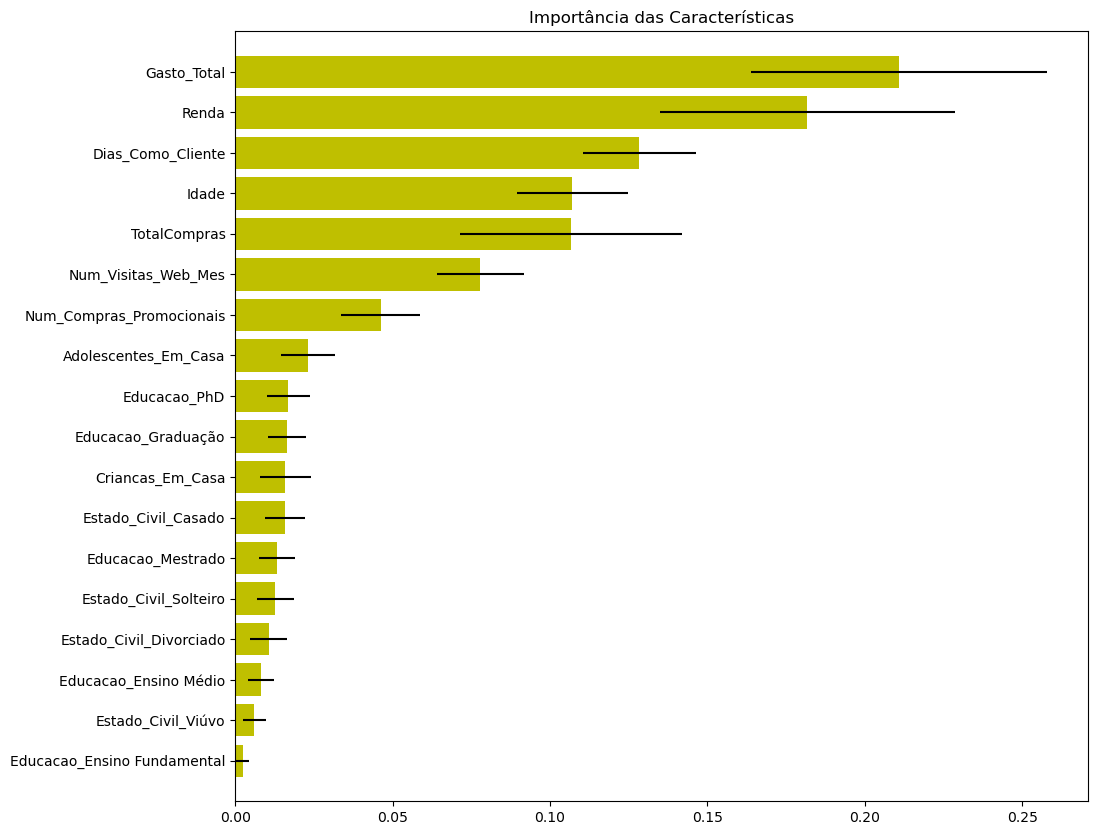

In [231]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## Teste de Hipóteses

Nível educacional não parece ser relevante para explicar a resposta do cliente à campanha de Marketing. Por outro lado, Renda é bastante relevante. É provável que a média de renda seja diferente entre os níveis educacionais.

Vou testar a hipótese de que existe diferença significativa entre as médias de Renda dos clientes Com Ensino Superior e Sem Ensino Superior. Antes, vou explorar essa relação.

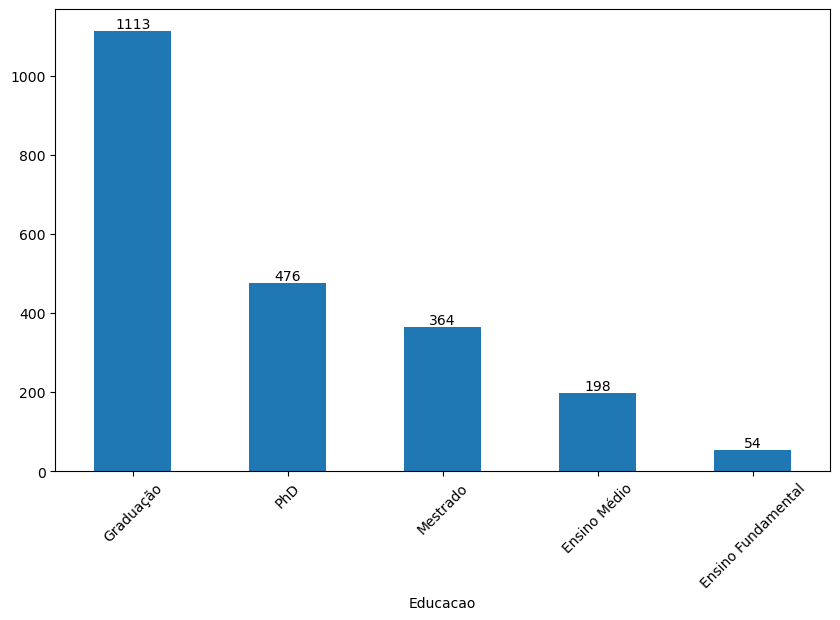

In [234]:
# Plot do total de clientes por nível educacional
plt.figure(figsize = (10, 6))
ax = df.Educacao.value_counts().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.bar_label(ax.containers[0])
plt.show;

In [238]:
df.columns

Index(['ID', 'Educacao', 'Estado_Civil', 'Renda', 'Criancas_Em_Casa',
       'Adolescentes_Em_Casa', 'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes',
       'Gasto_Peixes', 'Gasto_Doces', 'Gasto_Outros',
       'Num_Compras_Promocionais', 'Num_Compras_Web', 'Num_Compras_Catalogo',
       'Num_Compras_Loja', 'Num_Visitas_Web_Mes', 'Aceitou_Campanha_1',
       'Aceitou_Campanha_2', 'Aceitou_Campanha_3', 'Aceitou_Campanha_4',
       'Aceitou_Campanha_5', 'Aceitou_Campanha_6', 'Idade',
       'Dias_Como_Cliente', 'TotalCompras', 'Gasto_Total', 'RespostaCampanha'],
      dtype='object')

> Média de Renda Por Nível Educacional 

In [241]:
# Calcula a média
media_renda = df.groupby('Educacao')['Renda'].mean().reset_index()
media_renda = media_renda.sort_values(by = 'Renda')

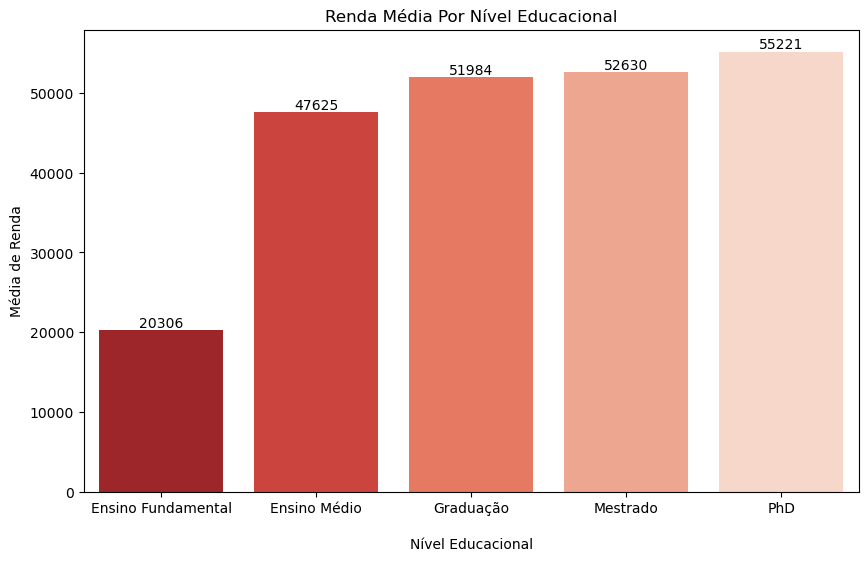

In [243]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = media_renda['Educacao'], y = media_renda['Renda'], data = df, palette = 'Reds_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'bottom')
plt.xlabel('\nNível Educacional')
plt.ylabel('Média de Renda')
plt.title('Renda Média Por Nível Educacional')
plt.show()

### Definindo as Hipóteses

Para escolher o Teste de Hipóteses preciso verificar se as variáveis seguem ou não uma distribuição normal. Se as variáveis seguirem uma distribuição normal posso usar um teste paramétrico. Caso contrário, devo usar um teste não paramétrico.

**Hipótese Nula (H0)**: "Não há diferença significativa nas médias de renda de grupos com e sem nível superior"

**Hipótese Alternativa (H1)**: "Há uma diferença significativa nas médias de renda de grupos com e sem nível superior"

In [246]:
# Representação numérica da variável categórica
df['Educacao'] = df['Educacao'].map({'Ensino Fundamental':1,
                                     'Ensino Médio':2,
                                     'Graduação':3,
                                     'Mestrado':4,
                                     'PhD':5})

In [250]:
df.head()

,ID,Educacao,Estado_Civil,Renda,Criancas_Em_Casa,Adolescentes_Em_Casa,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,...,Aceitou_Campanha_2,Aceitou_Campanha_3,Aceitou_Campanha_4,Aceitou_Campanha_5,Aceitou_Campanha_6,Idade,Dias_Como_Cliente,TotalCompras,Gasto_Total,RespostaCampanha
0,9970,3,Casado,55375.0,0,1,42,11,57,10,...,0,0,0,0,0,48,255,8,162,Não Aceitou
1,4002,5,Casado,77037.0,0,1,463,96,333,168,...,0,0,0,0,0,65,259,26,1123,Não Aceitou
2,10914,3,Solteiro,24163.0,1,1,4,1,7,2,...,0,0,0,0,0,55,1294,4,17,Não Aceitou
3,7279,5,Casado,69476.0,0,0,260,86,559,63,...,0,0,0,0,0,56,272,14,1044,Não Aceitou
4,10582,3,Casado,72063.0,0,1,180,32,348,76,...,0,0,0,0,0,46,2665,19,758,Não Aceitou


In [252]:
# Dados que serão testados
dados_para_testar = df[['Renda', 'Educacao']]

In [254]:
dados_para_testar.head()

,Renda,Educacao
0,55375.0,3
1,77037.0,5
2,24163.0,3
3,69476.0,5
4,72063.0,3


### Aplicando o Teste de Normalidade Para Selecionar o Teste de Hipóteses Adequado

* Teste de Shapiro-Wilk é especialmente útil para amostras pequenas

**Hipótese Nula (H0)**: Assume-se que a distribuição da amostra em questão não difere significativamente de uma distribuição normal teórica.

**Hipótese Alternativa (H1)**: Há evidências suficientes nos dados para sugerir que a distribuição se desvia da normalidade.

In [261]:
# Teste Shapiro-Wilk 
def dsa_testa_normal(columns):
    
    for column in columns:
        
        statistic, p_value = shapiro(dados_para_testar[column])

        alpha = 0.05
        
        if p_value < alpha:
             print(f'\n{column}: Alpha {alpha} < valor-p {p_value:.2f} - Rejeito a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.')
        else:
             print(f'\n{column}: Alpha {alpha} > valor-p {p_value:.2f} - Falho em Rejeitar a H0 do Teste Shapiro-Wilk: Os dados seguem uma distribuição normal.')

In [263]:
dsa_testa_normal(dados_para_testar)


Renda: Alpha 0.05 < valor-p 0.00 - Rejeito a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.

Educacao: Alpha 0.05 < valor-p 0.00 - Rejeito a H0 do Teste Shapiro-Wilk: Os dados não são normalmente distribuídos.


### Aplicando Teste de Hipóteses Não Paramétrico

O teste de Mann-Whitney U é usado para comparar diferenças entre dois grupos independentes quando os dados não seguem necessariamente uma distribuição normal. Este teste é uma alternativa não paramétrica ao teste t de Student para amostras independentes e é frequentemente usado quando as condições para o teste t não são atendidas (por exemplo, quando a distribuição dos dados é significativamente não normal).

In [267]:
# Criando os grupos
grupo_com_graduacao = df[df['Educacao'].isin([5, 4, 3])]['Renda']
grupo_sem_graduacao = df[df['Educacao'].isin([1, 2])]['Renda']

In [269]:
# Teste Mann-Whitney U 
statistic, p_value = mannwhitneyu(grupo_com_graduacao, grupo_sem_graduacao)

# Nível de significância
alpha = 0.05

# Resultado
if p_value < alpha:
    print("Rejeito a H0: Há uma diferença significativa nas médias de renda.")
else:
    print("Falho em rejeitar a H0: Não há diferença significativa nas médias de renda.")

Rejeito a H0: Há uma diferença significativa nas médias de renda.


# Conclusão

Os fatores mais relevantes que explicam a resposta dos clientes às campanhas de Marketing são o histórico de gasto total, a renda, o tempo total como cliente, idade e total de compras anteriores. Ou seja, clientes fiéis estão mais propensos a aceitar campanhas de Marketing.

O nível educacional e o estado civil não parecem ser fatores relevantes para explicar a resposta à campanha de Marketing. Decidimos então aplicar um teste de hipóteses.

Ao testar a hipótese que existe diferença significativa entre as médias de renda de clientes com ou sem graduação, ficou evidente que existe diferença. Vimos ainda que níveis educacionais mais altos têm média de renda maior.

Logo, a empresa deveria segmentar suas campanhas de Marketing para os diferentes públicos e direcionar as campanhas com base na renda e no nível educacional, considerando ainda histórico de gasto total, o tempo total como cliente, idade e total de compras anteriores.